In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the dataset using pandas
df_train_orig = pd.read_csv("train.csv")

# Create a copy of the dataset
df_train = df_train_orig.copy()

# Drop unnecessary columns
df_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Print the first few rows of the modified dataset to verify the changes
print(df_train.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [23]:
# Set PassengerId as index
df_train.set_index("PassengerId",inplace=True)
print(df_train.head())

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S


In [24]:
#identifying the columns with missing values
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [25]:
df_train['Age'].fillna(method='bfill',inplace=True)

In [26]:
df_train['Embarked'].fillna(method='ffill', inplace=True)

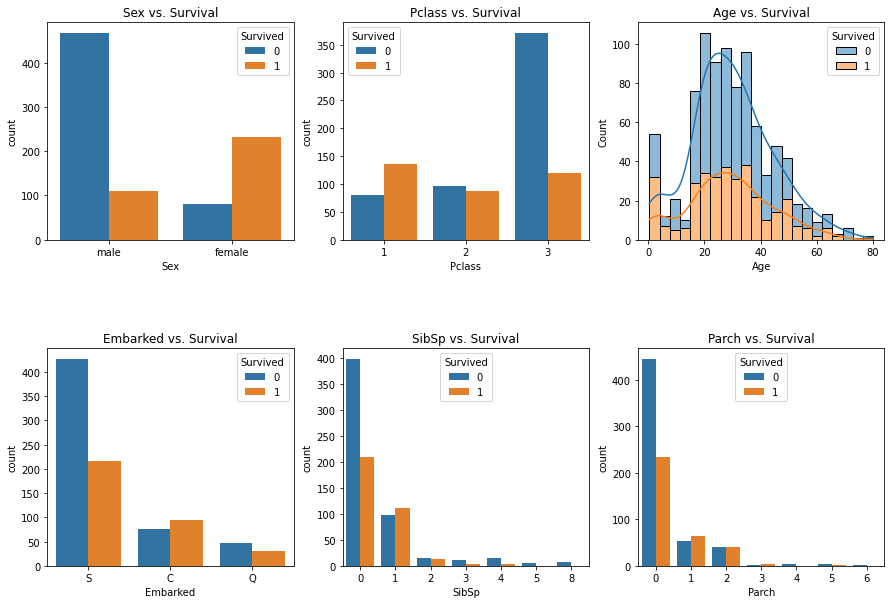

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Survived' feature to categorical
df_train['Survived'] = df_train['Survived'].astype('category')

# Create a figure with six subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'hspace': 0.5})

# Visualize the relationship between 'Sex' and 'Survived'
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=axs[0, 0])
axs[0, 0].set_title('Sex vs. Survival')

# Visualize the relationship between 'Pclass' and 'Survived'
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=axs[0, 1])
axs[0, 1].set_title('Pclass vs. Survival')

# Visualize the relationship between 'Age' and 'Survived'
sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Age vs. Survival')

# Visualize the relationship between 'Embarked' and 'Survived'
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=axs[1, 0])
axs[1, 0].set_title('Embarked vs. Survival')

# Visualize the relationship between 'SibSp' and 'Survived'
sns.countplot(x='SibSp', hue='Survived', data=df_train, ax=axs[1, 1])
axs[1, 1].set_title('SibSp vs. Survival')

# Visualize the relationship between 'Parch' and 'Survived'
sns.countplot(x='Parch', hue='Survived', data=df_train, ax=axs[1, 2])
axs[1, 2].set_title('Parch vs. Survival')


# Show the figure
plt.show()


### Preprocessing training set begins

In [28]:
# Feature scaling of numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['Age', 'Fare','SibSp','Parch']
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

In [29]:
print(df_train.head())

            Survived  Pclass     Sex       Age     SibSp     Parch      Fare  \
PassengerId                                                                    
1                  0       3    male -0.539468  0.432793 -0.473674 -0.502445   
2                  1       1  female  0.557213  0.432793 -0.473674  0.786845   
3                  1       3  female -0.265298 -0.474545 -0.473674 -0.488854   
4                  1       1  female  0.351585  0.432793 -0.473674  0.420730   
5                  0       3    male  0.351585 -0.474545 -0.473674 -0.486337   

            Embarked  
PassengerId           
1                  S  
2                  C  
3                  S  
4                  S  
5                  S  


In [30]:
# encoding categorical variables
categorical_columns = ['Sex', 'Embarked']
df_train = pd.get_dummies(df_train, columns=categorical_columns)

# Print the first few rows of the modified dataset to verify the changes
print(df_train.head())

            Survived  Pclass       Age     SibSp     Parch      Fare  \
PassengerId                                                            
1                  0       3 -0.539468  0.432793 -0.473674 -0.502445   
2                  1       1  0.557213  0.432793 -0.473674  0.786845   
3                  1       3 -0.265298 -0.474545 -0.473674 -0.488854   
4                  1       1  0.351585  0.432793 -0.473674  0.420730   
5                  0       3  0.351585 -0.474545 -0.473674 -0.486337   

             Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                                            
1                     0         1           0           0           1  
2                     1         0           1           0           0  
3                     1         0           0           0           1  
4                     1         0           0           0           1  
5                     0         1           0           0      

### Preparing the test set

In [31]:
# import test data
test_set = pd.read_csv("test.csv")
test_data = test_set.copy()

# Print the first few rows to verify that the data was loaded correctly
print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [32]:
test_data.set_index("PassengerId",inplace=True)

In [33]:
test_data.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [34]:
# Forward fill missing values in 'Age' and 'Fare' columns
test_data['Age'].fillna(method='ffill', inplace=True)
test_data['Fare'].fillna(method='ffill', inplace=True)


In [35]:
# Drop unnecessary columns
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# feature scaling of numerical columns
scaler = StandardScaler()
test_data[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(test_data[['Age', 'Fare', 'SibSp', 'Parch']])

# Encode categorical variables using one-hot encoding
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

# Show the preprocessed test data
print(test_data.head())


             Pclass       Age     SibSp     Parch      Fare  Sex_female  \
PassengerId                                                               
892               3  0.314998 -0.499470 -0.400248 -0.497071           0   
893               3  1.214994  0.616992 -0.400248 -0.511934           1   
894               2  2.294989 -0.499470 -0.400248 -0.463762           0   
895               3 -0.224999 -0.499470 -0.400248 -0.482135           0   
896               3 -0.584997  0.616992  0.619896 -0.417159           1   

             Sex_male  Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                                
892                 1           0           1           0  
893                 0           0           0           1  
894                 1           0           1           0  
895                 1           0           0           1  
896                 0           0           0           1  


### Training and testing starts

In [37]:
from sklearn.linear_model import LogisticRegression


# Split features and target variable
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Make predictions on test set
y_pred = logreg.predict(test_data)

# Create a DataFrame with the PassengerId and predicted Survived values
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': y_pred})

# Save the predictions to a CSV file
output.to_csv('my_submission.csv', index=False)